In [3]:
pip install ucimlrepo


In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [7]:
X.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0


In [8]:
X.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


Missing values handled:

In [10]:
X['ca'] = X['ca'].fillna(X['ca'].mean())
most_freqent_category = X['thal'].mode().iloc[0]
X['thal'] = X['thal'].fillna(most_freqent_category)

<ipython-input-10-185f8456a1a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ca'] = X['ca'].fillna(X['ca'].mean())
<ipython-input-10-185f8456a1a1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['thal'] = X['thal'].fillna(most_freqent_category)


In [11]:
X.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


In [13]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   num     303 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


In [14]:
duplicates = X[X.duplicated(keep='first')]
duplicates

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal


##Encoding: No heart disease = 0 , Heart disease present = 1 (when values are >0)

In [15]:
y.loc[ y['num'] == 0, 'num'] =0
y.loc[(y['num'] > 0) & (y['num'] <= 4), 'num'] = 1

<ipython-input-15-a73095494883>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[ y['num'] == 0, 'num'] =0
<ipython-input-15-a73095494883>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[(y['num'] > 0) & (y['num'] <= 4), 'num'] = 1


In [16]:
df = X
df["num"] = y
df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,1
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,1
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0.5, 0, 'age'),
  Text(1.5, 0, 'sex'),
  Text(2.5, 0, 'cp'),
  Text(3.5, 0, 'trestbps'),
  Text(4.5, 0, 'chol'),
  Text(5.5, 0, 'fbs'),
  Text(6.5, 0, 'restecg'),
  Text(7.5, 0, 'thalach'),
  Text(8.5, 0, 'exang'),
  Text(9.5, 0, 'oldpeak'),
  Text(10.5, 0, 'slope'),
  Text(11.5, 0, 'ca'),
  Text(12.5, 0, 'thal'),
  Text(13.5, 0, 'num')])

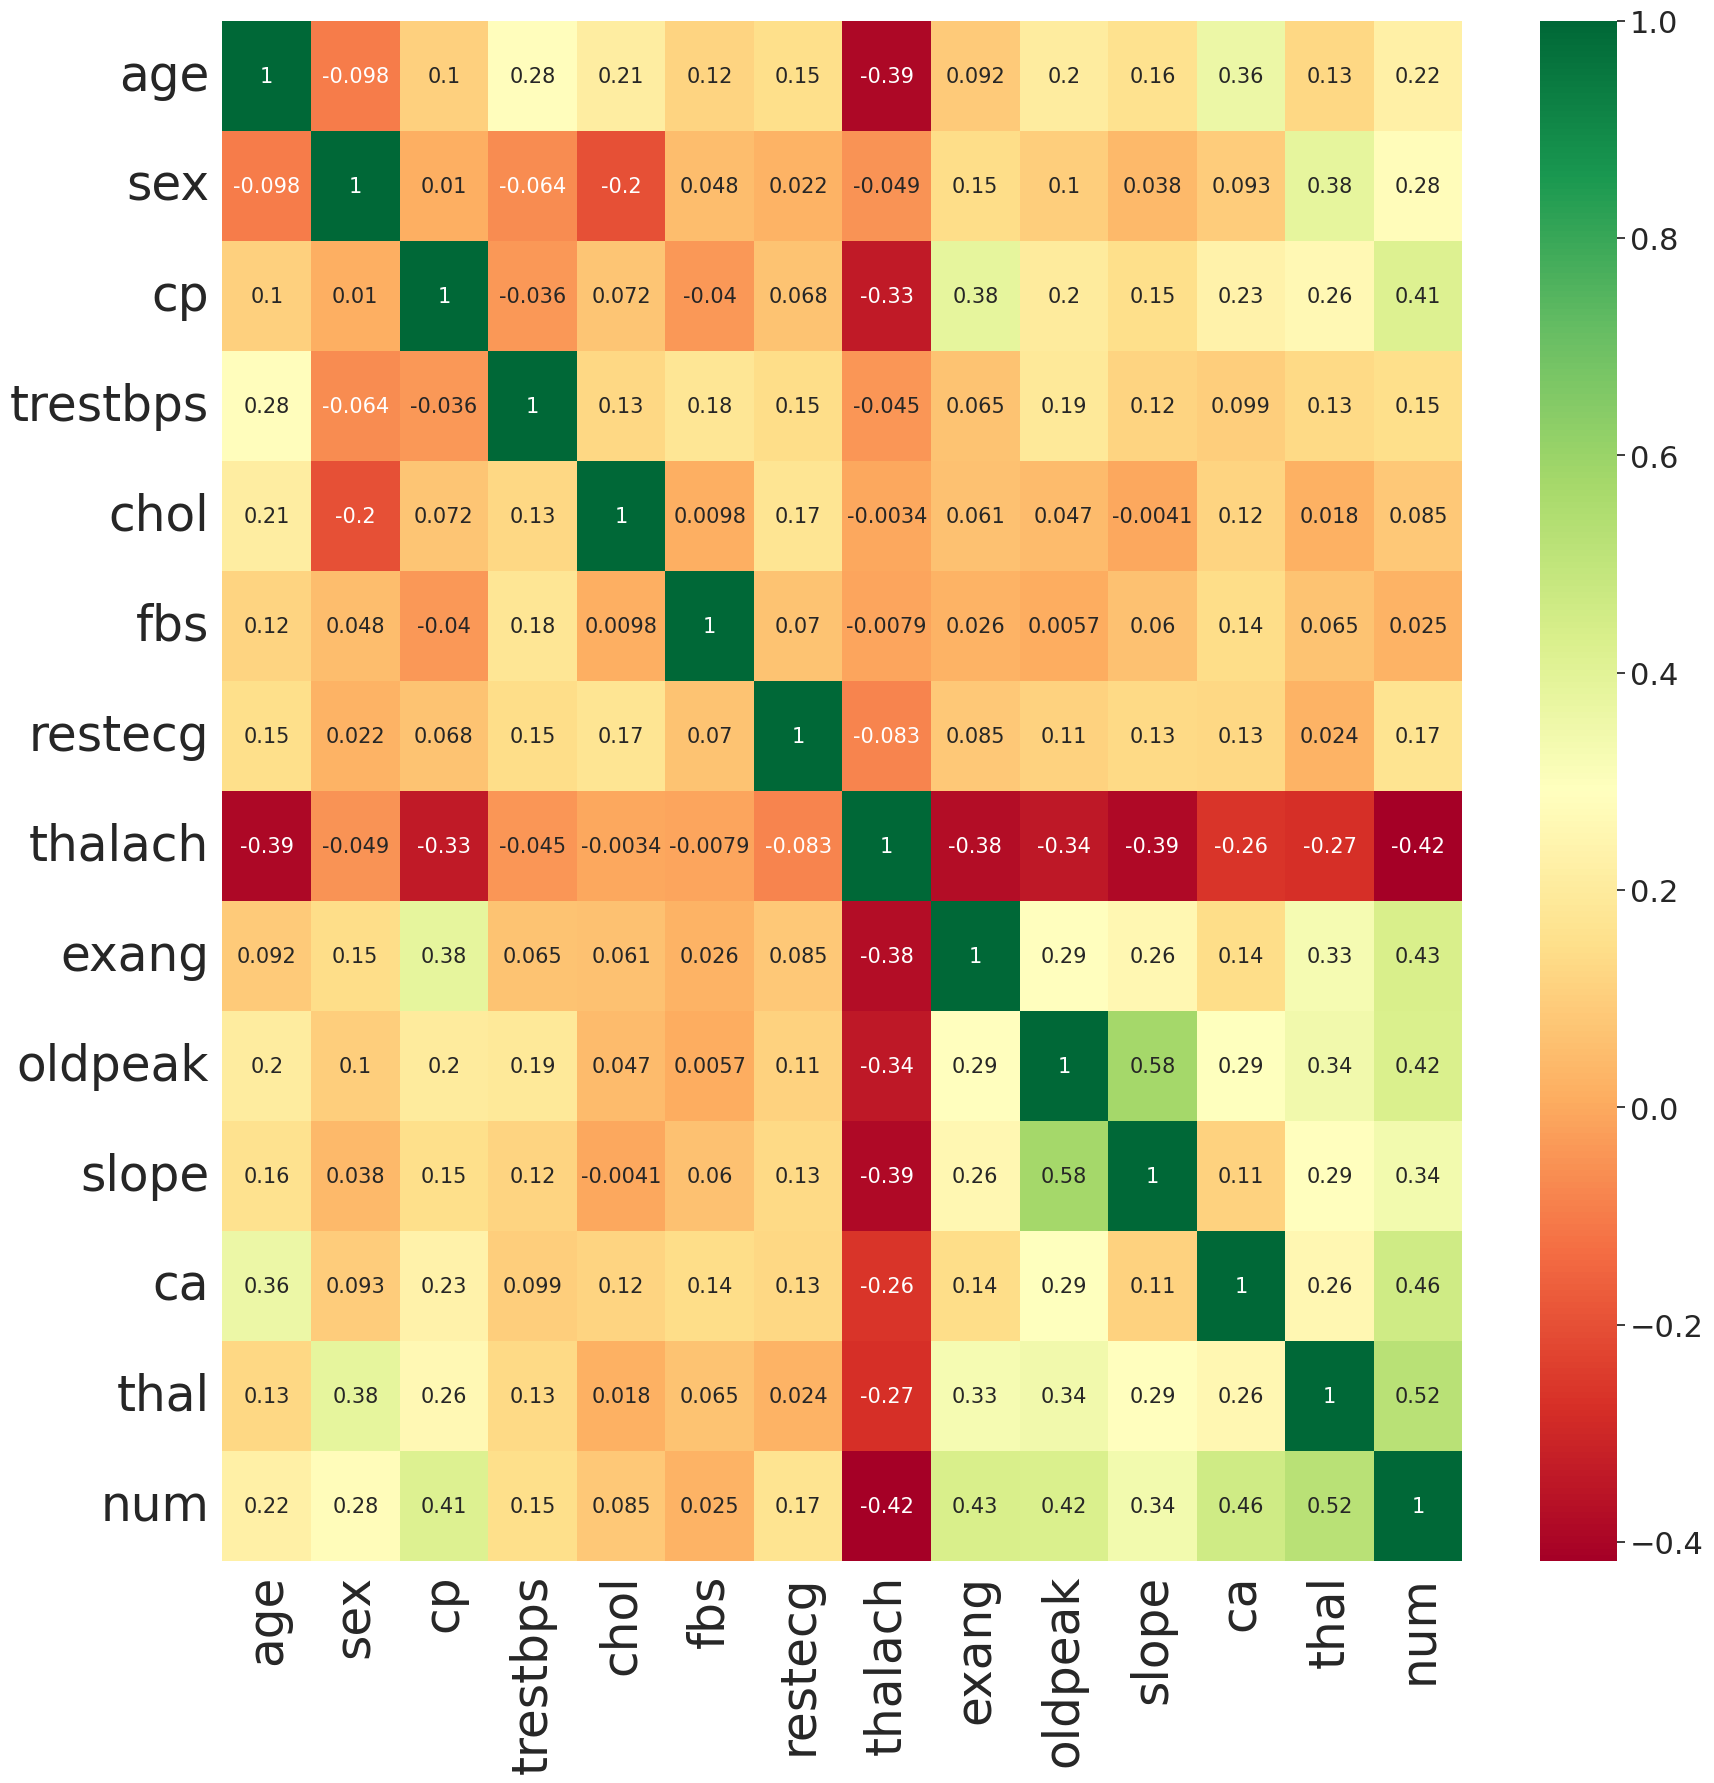

In [18]:
sns.set(font_scale=2)
plt.subplots(figsize=(20,20))
heat_plot = sns.heatmap(df.corr(method='pearson'), annot=True, cmap= 'RdYlGn', annot_kws={'size':15})

plt.yticks(fontsize=35)
plt.xticks(fontsize=35)

In [19]:
correaltions = df.corr(method='pearson')
print(correaltions['age'].sort_values(ascending=False).to_string())

age         1.000000
ca          0.359489
trestbps    0.284946
num         0.223120
chol        0.208950
oldpeak     0.203805
slope       0.161770
restecg     0.148868
thal        0.128303
fbs         0.118530
cp          0.104139
exang       0.091661
sex        -0.097542
thalach    -0.393806


In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [21]:
scaler1 = MinMaxScaler()
MinMax_scaled_df = scaler1.fit_transform(X)
MinMax_scaled_df



array([[0.70833333, 1.        , 0.        , ..., 0.        , 0.75      ,
        0.        ],
       [0.79166667, 1.        , 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.79166667, 1.        , 1.        , ..., 0.66666667, 1.        ,
        1.        ],
       ...,
       [0.58333333, 1.        , 1.        , ..., 0.33333333, 1.        ,
        1.        ],
       [0.58333333, 0.        , 0.33333333, ..., 0.33333333, 0.        ,
        1.        ],
       [0.1875    , 1.        , 0.66666667, ..., 0.22408027, 0.        ,
        0.        ]])

In [22]:
scaler2=StandardScaler()
STD_scaled_df = scaler2.fit_transform(X)
STD_scaled_df

array([[ 0.94872647,  0.68620244, -2.25177456, ..., -0.72309499,
         0.66000414, -0.92063075],
       [ 1.39200191,  0.68620244,  0.87798549, ...,  2.50385129,
        -0.89023814,  1.08621182],
       [ 1.39200191,  0.68620244,  0.87798549, ...,  1.42820253,
         1.17675157,  1.08621182],
       ...,
       [ 0.28381332,  0.68620244,  0.87798549, ...,  0.35255377,
         1.17675157,  1.08621182],
       [ 0.28381332, -1.4572959 , -1.20852121, ...,  0.35255377,
        -0.89023814,  1.08621182],
       [-1.82174501,  0.68620244, -0.16526786, ...,  0.        ,
        -0.89023814, -0.92063075]])

In [23]:
from sklearn.model_selection import train_test_split


In [34]:
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size = 0.20, random_state=40)

In [35]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 69 to 219
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       242 non-null    int64  
 1   sex       242 non-null    int64  
 2   cp        242 non-null    int64  
 3   trestbps  242 non-null    int64  
 4   chol      242 non-null    int64  
 5   fbs       242 non-null    int64  
 6   restecg   242 non-null    int64  
 7   thalach   242 non-null    int64  
 8   exang     242 non-null    int64  
 9   oldpeak   242 non-null    float64
 10  slope     242 non-null    int64  
 11  ca        242 non-null    float64
 12  thal      242 non-null    float64
 13  num       242 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 28.4 KB


In [36]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 69 to 219
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   num     242 non-null    int64
dtypes: int64(1)
memory usage: 3.8 KB


In [37]:
print("Train data size (features):",len(x_train))
print("Train data size (target):",len(x_train))
print("Test data size (features):",len(y_test))
print("Test data size (target):",len(y_test))

Train data size (features): 242
Train data size (target): 242
Test data size (features): 61
Test data size (target): 61


In [38]:
from sklearn.tree import DecisionTreeClassifier

DTClassifier = DecisionTreeClassifier(criterion = 'gini',
                                    max_depth = 5,
                                    min_samples_split = 2,
                                    min_samples_leaf = 1,
                                    max_features = None,
                                    max_leaf_nodes = None,
                                    min_impurity_decrease= 0.01)

In [39]:
DTClassifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.01)

In [42]:
y_pred = DTClassifier.predict(x_test)

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [44]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [46]:
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("F1: ", f1)
print("Recall: ", recall)


Accuracy:  1.0
Precision:  1.0
F1:  1.0
Recall:  1.0
